Text(0.5, 0, 'TIME')

Text(0, 0.5, 'TIME')

Text(0.5, 1.0, 'TIME vs. TIME')

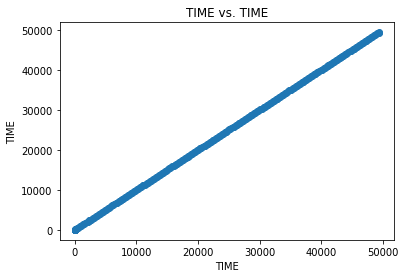

Text(0.5, 0, 'TIME')

Text(0, 0.5, 'TW')

Text(0.5, 1.0, 'TW vs. TIME')

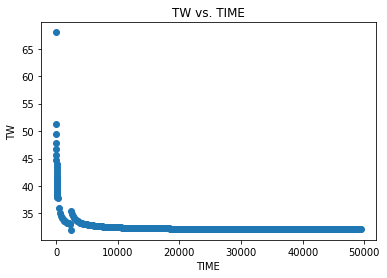

Text(0.5, 0, 'TIME')

Text(0, 0.5, 'TA')

Text(0.5, 1.0, 'TA vs. TIME')

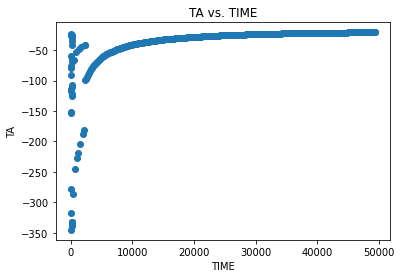

Text(0.5, 0, 'TIME')

Text(0, 0.5, 'TS')

Text(0.5, 1.0, 'TS vs. TIME')

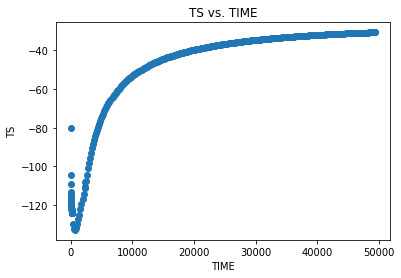

Text(0.5, 0, 'TIME')

Text(0, 0.5, 'MW')

Text(0.5, 1.0, 'MW vs. TIME')

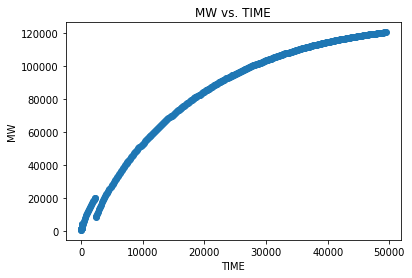

Text(0.5, 0, 'TIME')

Text(0, 0.5, 'D')

Text(0.5, 1.0, 'D vs. TIME')

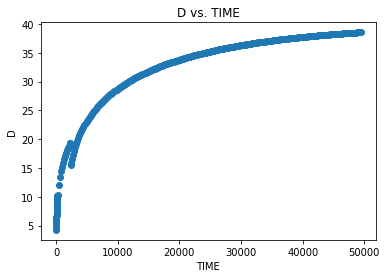

Text(0.5, 0, 'TIME')

Text(0, 0.5, 'HW')

Text(0.5, 1.0, 'HW vs. TIME')

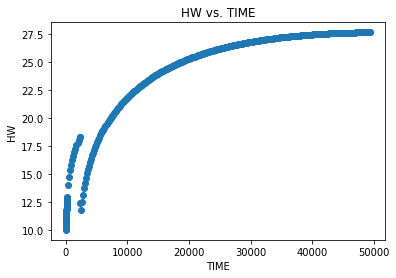

Text(0.5, 0, 'TIME')

Text(0, 0.5, 'HWB')

Text(0.5, 1.0, 'HWB vs. TIME')

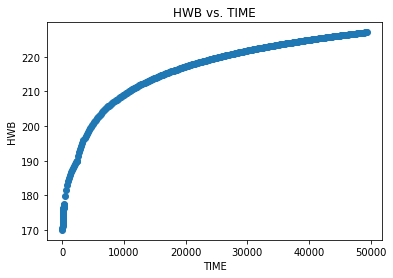

Text(0.5, 0, 'TIME')

Text(0, 0.5, 'AI')

Text(0.5, 1.0, 'AI vs. TIME')

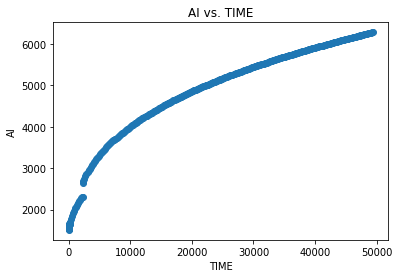

Text(0.5, 0, 'TIME')

Text(0, 0.5, 'VA')

Text(0.5, 1.0, 'VA vs. TIME')

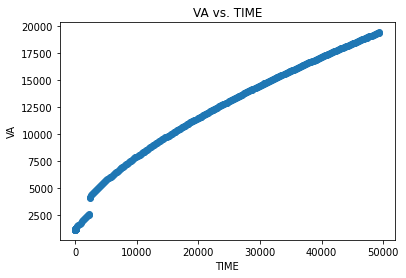

In [52]:
# READING FROM TABLES
import numpy as np 
import pandas as pd 
import numpy.linalg as la 
import matplotlib.pyplot as plt
from io import StringIO
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Helper Functions 
def minusparse(line):
    newline = ""
    for i in range(len(line)):
        if(line[i] == '-'):
            newline += " " + line[i]
        else:
            newline += line[i]
    return newline

def dataparse(line):
    temp = [x.strip().replace(',', '') for x in line.split("\t") if x != '']
    temp[-1] = temp[-1][:-1]
    string_temp = ""
    for item in temp:
        string_temp += "," + item
    return string_temp 
# END HELPER FUNCTIONS

cnt = 0 
data = "" 
f = open("output.txt", "r")
for _ in range(15): # eliminate beginning text 
    __ = f.readline()

# Get features
features = [x.strip() for x in f.readline().split("\t") if x != '']
    
# Get first table 
line = f.readline() 
newline = minusparse(line)
for _ in range(29):
    data += str(cnt) + dataparse(newline) + "\n"
    newline = minusparse(f.readline())
    cnt += 1
    
# Get tables 
for _ in range(21):
    line = f.readline()
    if(len(line.split()) == 0):
        line = 'NONE'
    while(line.split()[0] != "START"):
        line = f.readline()
        if(len(line.split()) == 0):
            line = 'NONE'
    line = f.readline() # eliminate empty line 
    line = f.readline() 

    newline = minusparse(line)
    while newline != '\n':
        data += str(cnt) + dataparse(newline) + "\n"
        newline = minusparse(f.readline())
        cnt += 1

# Convert to pandas object 
TESTDATA = StringIO(data)
df = pd.read_csv(TESTDATA, names=features)

# Graph data for each column vs TIME 

for name in features: 
    plt.scatter(df["TIME"], df[name])
    plt.xlabel("TIME")
    plt.ylabel(name)
    plt.title(name + " vs. TIME")
    plt.show()
